<a href="https://colab.research.google.com/github/otidin/Cheminformatics_QSAR_DNN/blob/master/PyPharma_Cheminformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cheminformatics workshop: from QSAR to DNN

### PyPharmaEU Cheminformatics Workshop, 21 November 2019, Basel, Switzerland 

Link to colab notebook http://tiny.cc/pypharma_cinf

- Collected by: Dr David Marcus, Molecular Design, Data and Computational Sciences, GlaxSmithKline
- Contact: david.x.marcus@gsk.com

### Intoroduction

The workshop was created to give a short(ish) overview of the current availble tools and practices in cheminformatics using open-source public availble data and code (e.g. rdkit, scikit-learn, torch etc.). This includes how to efficiently represent small molecules space, mine and visualise it; how to apply machine learning algorithms to effiecnelty navigate it and how to generate and evaluate new ideas to drive innovation. 

The following notebook is a collection of python code based on the rdkit library (www.rdkit.org), taken from various posts, blogs, forum questions and tutorials I found on the web (appologies in advance if citation is missing or wrong).

Most of the examples were taken from the rdkit excellent tutorial: https://www.rdkit.org/docs/GettingStartedInPython.html and cookbook https://www.rdkit.org/docs/Cookbook.html

Some examples were inspired or copied from these super helpful Cheminfromatics blogs: 
- http://rdkit.blogspot.com/
- https://iwatobipen.wordpress.com/
- http://practicalcheminformatics.blogspot.com/
- https://www.macinchem.org/index.php
- https://baoilleach.blogspot.com/
- http://blog.rguha.net/


Some concepts in this notebook were first introcduced in a recent paper we published:
Green et al. BRADSHAW: a system for automated molecular design, J Comp. Aid. Mol. Design 2019
https://link.springer.com/article/10.1007/s10822-019-00234-8 (open-access)

The molecular dataset used as an example in this workshop is taken from the following paper:
Pickett et al. Automated Lead Optimization of MMP-12 Inhibitors Using a Genetic Algorithm, ACS Med. Chem. Lett. 2011 
https://pubs.acs.org/doi/10.1021/ml100191f

### Installation

In [0]:
# to download the dataset uncomment and run the folloiwng command: 

!wget -c https://pubs.acs.org/doi/suppl/10.1021/ml100191f/suppl_file/ml100191f_si_002.xls

--2019-11-21 12:22:53--  https://pubs.acs.org/doi/suppl/10.1021/ml100191f/suppl_file/ml100191f_si_002.xls
Resolving pubs.acs.org (pubs.acs.org)... 104.18.0.20, 104.18.1.20
Connecting to pubs.acs.org (pubs.acs.org)|104.18.0.20|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ml100191f/suppl_file/ml100191f_si_002.xls?cookieSet=1 [following]
--2019-11-21 12:22:59--  https://pubs.acs.org/doi/suppl/10.1021/ml100191f/suppl_file/ml100191f_si_002.xls?cookieSet=1
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://pubs.acs.org/doi/suppl/10.1021/ml100191f/suppl_file/ml100191f_si_002.xls [following]
--2019-11-21 12:22:59--  https://pubs.acs.org/doi/suppl/10.1021/ml100191f/suppl_file/ml100191f_si_002.xls
Reusing existing connection to pubs.acs.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 548352 (536K) [application/vnd.ms-excel]
Saving to: ‘ml10019

In [0]:
# to install and load rdkit using miniconda run uncomment and run below:

!wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh && bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local
!conda install -q -y -c conda-forge rdkit

--2019-11-21 12:23:19--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   132MB/s    in 0.5s    

2019-11-21 12:23:19 (132 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
# general imports

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import numpy as np
import pandas as pd
from IPython.display import Image, HTML

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
# test rdkit

import rdkit
rdkit.__version__

'2019.09.1'

### Read data

In [0]:
# reading the excel dataset of MMP12 inhibitors

data=pd.read_excel('./ml100191f_si_002.xls')
data.head()

,Index,Tag,Atag,Btag,pIC50_MMP12,Smiles,A_SortMax,B_SortMax,Final QC Purity,Generation-No
0,1,A01B01,A01,B01,6.5,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,7,12,>98,Gen-5
1,2,A01B02,A01,B02,6.8,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,7,5,>98,Gen-3
2,3,A01B03,A01,B03,Assay Failed,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,7,16,>98,NaN
3,4,A01B04,A01,B04,7.1,Cc1ccc(cc1)c2ccc(cc2)S(=O)(=O)N[C@@H](Cc3ccc(O...,7,9,>98,NaN
4,5,A01B05,A01,B05,5.1,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c...,7,32,>98,NaN


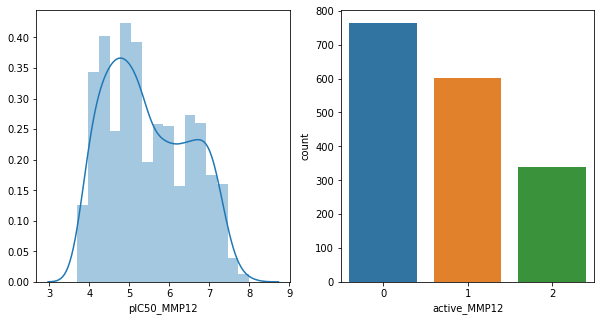

In [0]:
# clean activities

data=data[pd.to_numeric(data['pIC50_MMP12'], errors='coerce').notnull()] # remove failed rows
data['pIC50_MMP12']=pd.to_numeric(data['pIC50_MMP12'])

# bin activities to three activity classes
n_bins = 3
data['active_MMP12']=pd.cut(data['pIC50_MMP12'],n_bins,labels=range(n_bins))

# visualise activities and classes
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(data.pIC50_MMP12,ax=ax[0])
sns.countplot(data['active_MMP12'],ax=ax[1])

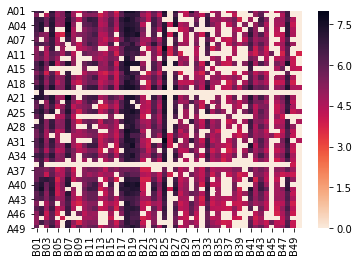

In [0]:
# visualise the array of 50 x 50 monomer tags by activity

Atags = sorted(list(set(data.Atag)))
Btags = sorted(list(set(data.Btag)))
matrix = pd.DataFrame(0,index=Atags,columns=Btags)

for index, row in data.iterrows():
    matrix.loc[row['Atag'],row['Btag']]=row['pIC50_MMP12']

cmap = sns.cm.rocket_r
sns.heatmap(matrix, cmap=cmap)

In [0]:
# clean and standardise molecules

from rdkit import Chem
from rdkit.Chem import MolStandardize
from rdkit.Chem.MolStandardize import rdMolStandardize

normalizer = rdMolStandardize.Normalizer() # normalise charges
remover = rdMolStandardize.FragmentRemover() # remove smaller fragments from the main compound

std_smiles=[]
for smiles in data['Smiles']:
    can_smiles=MolStandardize.canonicalize_tautomer_smiles(smiles)
    mol=normalizer.normalize(remover.remove(Chem.MolFromSmiles(can_smiles)))
    std_smiles.append(Chem.MolToSmiles(mol))

data['clean_smiles']=std_smiles # save the washed smiles

RDKit INFO: [12:32:01] Initializing Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:32:01] Running Normalizer
RDKit INFO: [12:32:01] Running FragmentRemover
RDKit INFO: [12:

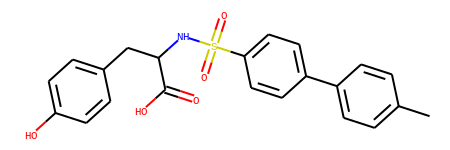

In [0]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

mols = [Chem.MolFromSmiles(smiles) for smiles in data['clean_smiles']] # read smiles into rdkit molecules
mols[2]

,Index,Tag,Atag,Btag,pIC50_MMP12,Smiles,A_SortMax,B_SortMax,Final QC Purity,Generation-No,active_MMP12,clean_smiles,mol
0,1,A01B01,A01,B01,6.5,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c3ccccc3,7,12,>98,Gen-5,1,O=C(O)C(Cc1ccc(O)cc1)NS(=O)(=O)c1ccc(-c2ccccc2)cc1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1,2,A01B02,A01,B02,6.8,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c3ccc(Br)cc3,7,5,>98,Gen-3,2,O=C(O)C(Cc1ccc(O)cc1)NS(=O)(=O)c1ccc(-c2ccc(Br)cc2)cc1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3,4,A01B04,A01,B04,7.1,Cc1ccc(cc1)c2ccc(cc2)S(=O)(=O)N[C@@H](Cc3ccc(O)cc3)C(=O)O,7,9,>98,NaN,2,Cc1ccc(-c2ccc(S(=O)(=O)NC(Cc3ccc(O)cc3)C(=O)O)cc2)cc1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
4,5,A01B05,A01,B05,5.1,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c3cccc4c5ccccc5oc34,7,32,>98,NaN,0,O=C(O)C(Cc1ccc(O)cc1)NS(=O)(=O)c1ccc(-c2cccc3c2oc2ccccc23)cc1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
5,6,A01B06,A01,B06,5.4,OC(=O)[C@H](Cc1ccc(O)cc1)NS(=O)(=O)c2ccc(cc2)c3cccc4Sc5ccccc5Sc34,7,37,>98,NaN,1,O=C(O)C(Cc1ccc(O)cc1)NS(=O)(=O)c1ccc(-c2cccc3c2Sc2ccccc2S3)cc1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

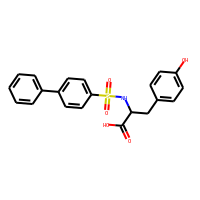
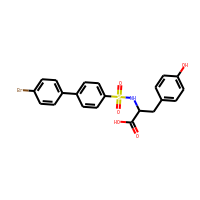
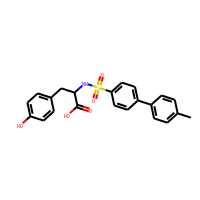
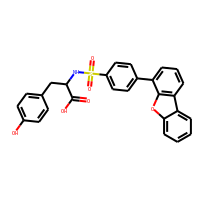
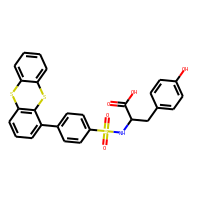

In [0]:
data['mol']=mols # store mol object in pandas
HTML(data.head().to_html())

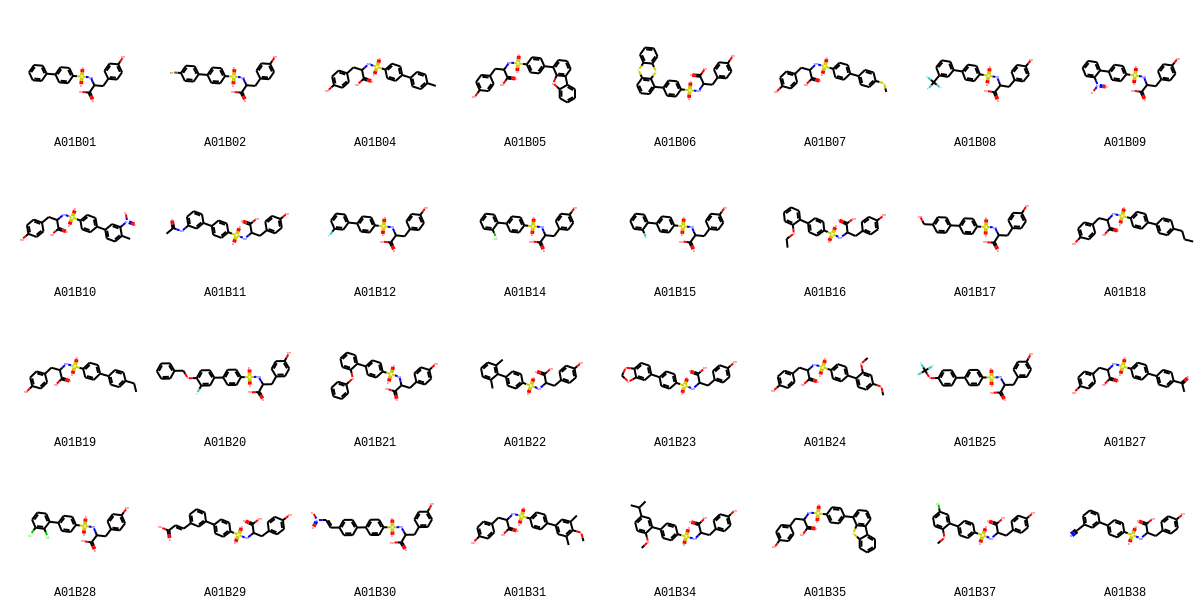

In [0]:
# another way to visualise compounds using pandas

from rdkit.Chem import PandasTools

PandasTools.FrameToGridImage(data[:32],column= 'mol', molsPerRow=8,subImgSize=(150,150),legendsCol="Tag")

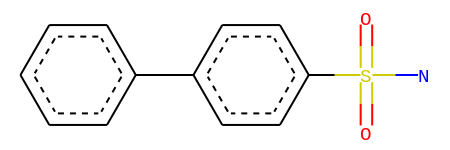

In [0]:
# find the maximum common substructure

from rdkit.Chem import rdFMCS

res=rdFMCS.FindMCS(mols)
mcs=Chem.MolFromSmarts(res.smartsString)
mcs

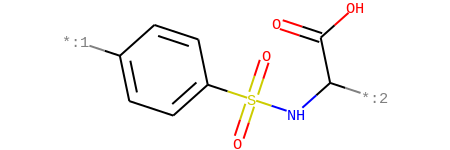

In [0]:
# read the sacffold smarts from the paper

scaffold='O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2]'
core=Chem.MolFromSmiles(scaffold)
core

(0, 1, 2, 3, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26, 27, 4)


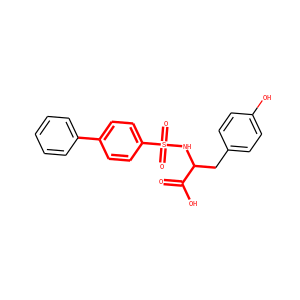

In [0]:
# match core to the first molecule

from rdkit.Chem import Draw
from matplotlib import colors

matches = mols[0].GetSubstructMatches(Chem.MolFromSmarts(scaffold))[0]
print(matches)

Draw.MolToImage(mols[0], highlightAtoms=matches, highlightColor=colors.to_rgb('red'))

,Core,R1,R2,mol_core,mol_R1,mol_R2
0,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],c1ccc([*:1])cc1,Oc1ccc(C[*:2])cc1,,,
1,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],Brc1ccc([*:1])cc1,Oc1ccc(C[*:2])cc1,,,
2,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],Cc1ccc([*:1])cc1,Oc1ccc(C[*:2])cc1,,,
3,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],c1ccc2c(c1)oc1c([*:1])cccc12,Oc1ccc(C[*:2])cc1,,,
4,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],c1ccc2c(c1)Sc1cccc([*:1])c1S2,Oc1ccc(C[*:2])cc1,,,
5,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],CSc1ccc([*:1])cc1,Oc1ccc(C[*:2])cc1,,,
6,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],FC(F)(F)c1cccc([*:1])c1,Oc1ccc(C[*:2])cc1,,,
7,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],O=[N+]([O-])c1ccccc1[*:1],Oc1ccc(C[*:2])cc1,,,
8,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],Cc1ccc([*:1])cc1[N+](=O)[O-],Oc1ccc(C[*:2])cc1,,,
9,O=C(O)C(NS(=O)(=O)c1ccc([*:1])cc1)[*:2],CC(=O)Nc1cccc([*:1])c1,Oc1ccc(C[*:2])cc1,,,

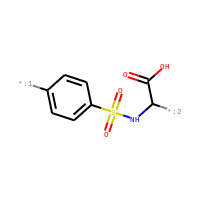
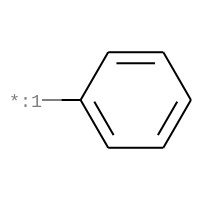
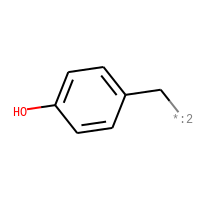
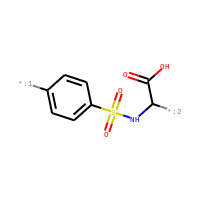
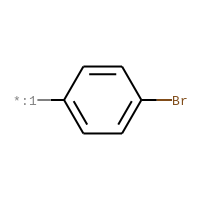
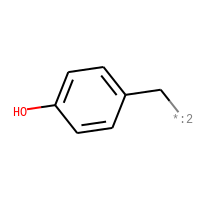
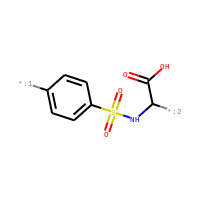
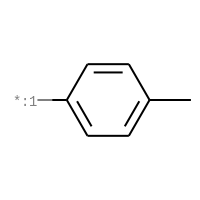
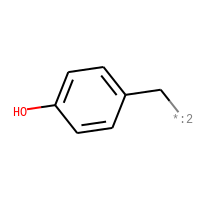
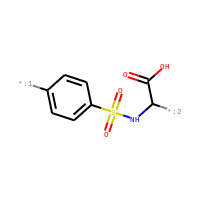
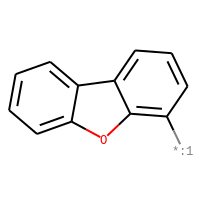
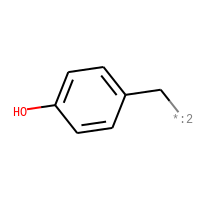
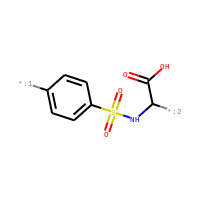
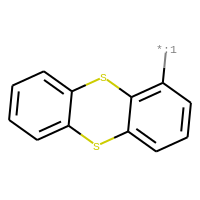
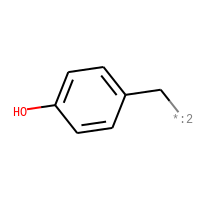
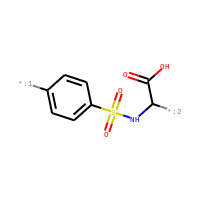
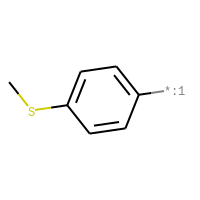
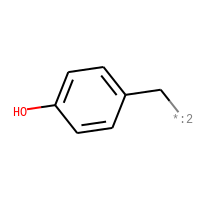
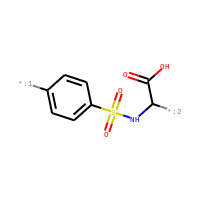
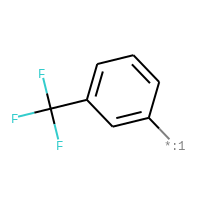
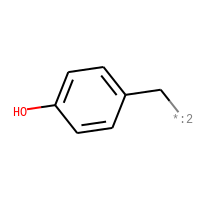
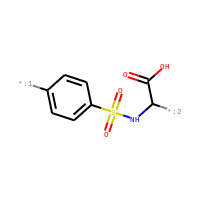
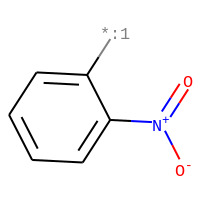
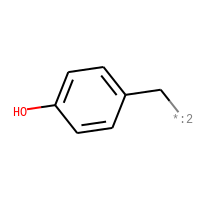
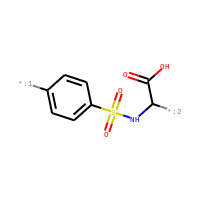
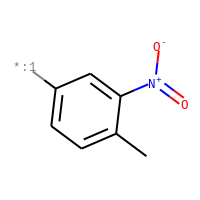
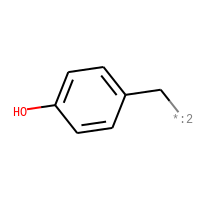
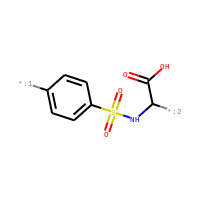
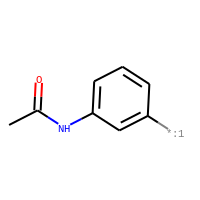
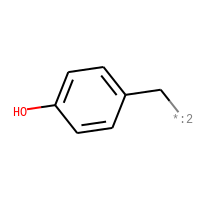

In [0]:
# decompose each molecule to core and monomers in each group

from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import PandasTools

res,unmatched = rdRGroupDecomposition.RGroupDecompose(core,mols[:10],asSmiles=True,asRows=False)
dec=pd.DataFrame(res)

PandasTools.AddMoleculeColumnToFrame(dec,smilesCol='Core',molCol='mol_core')
PandasTools.AddMoleculeColumnToFrame(dec,smilesCol='R1',molCol='mol_R1')
PandasTools.AddMoleculeColumnToFrame(dec,smilesCol='R2',molCol='mol_R2')
HTML(dec.to_html())

In [0]:
# free-wilson

# https://github.com/PatWalters/Free-Wilson

In [0]:
# search chembl data

# https://github.com/chembl/chembl_webresource_client

## Fingerprints

In [0]:
# MACCS keys

from rdkit.Chem import MACCSkeys

maccs_fps=np.array([MACCSkeys.GenMACCSKeys(mol) for mol in mols])
maccs_fps[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [0]:
# estates

from rdkit.Chem.EState import Fingerprinter

Fingerprinter.FingerprintMol(mols[0])[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0, 13,  1,  0,  0,  1,  5,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [0]:
# atom pairs

from rdkit.Chem.AtomPairs import Pairs

Pairs.GetAtomPairFingerprint(mols[0]).GetNonzeroElements().keys()

dict_keys([574529, 689218, 689219, 689221, 689222, 689225, 689226, 689227, 689251, 689252, 689253, 689256, 689257, 689258, 689473, 689474, 689475, 689476, 689477, 689478, 689479, 689480, 689481, 689483, 689484, 689485, 689486, 705601, 705602, 705604, 705607, 705608, 705633, 705634, 705635, 705637, 705638, 705639, 705857, 705858, 705859, 705860, 705861, 705862, 705863, 705865, 705866, 705867, 705868, 705869, 705870, 705871, 705889, 705891, 705892, 705893, 705894, 705895, 705896, 705897, 705899, 705900, 1082434, 1082465, 1082691, 1082692, 1082693, 1082695, 1082696, 1082697, 1082722, 1082723, 1082725, 1082726, 1590339, 1590341, 1590370, 1590374, 1590594, 1590595, 1590597, 1590598, 1590599, 1590602, 1590603, 1590604, 1590606, 1590607, 1590608, 1590625, 1590628, 1590629, 1590631, 1590632, 1590633, 1590636, 1590637, 1591363, 1591367, 1592360, 1721411, 1721412, 1721442, 1721443, 1721667, 1721668, 1721669, 1721670, 1721671, 1721672, 1721673, 1721674, 1721675, 1721676, 1721697, 1721698, 1721700

In [0]:
Pairs.ExplainPairScore(574529)

(('C', 2, 0), 1, ('C', 3, 0))

In [0]:
# pharmacophore

from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate

np.array(Generate.Gen2DFingerprint(mols[0],Gobbi_Pharm2D.factory).GetOnBits())

array([    8,     9,    11,    12,    13,    21,    23,    26,    28,
          33,    57,    58,    59,    62,    70,    71,    72,    73,
          74,    75,    76,    77,    78,    79,    80,    81,    82,
          83,   147,   148,   150,   152,   153,   154,   155,   157,
         159,   160,   183,   187,   188,  3000,  3096,  3108,  3149,
        3151,  3170,  3195,  3198,  3216,  3606,  3621,  3641,  3652,
        3666,  3693,  3754,  3770,  3801,  3815,  3839,  3849,  3862,
        3885,  3937,  3972,  3983,  4024,  4085,  4132,  4170,  4180,
        4216,  7293,  7307,  7444,  7459,  7570,  7624,  7665,  7775,
        9099, 12472, 12473, 12493, 12494, 12893, 12901, 12909, 12916,
       12919, 12948, 12965, 12968, 12976, 12990, 12992, 13013, 13134,
       13136, 13140, 13141, 13143, 13144, 13150, 13154, 13156, 13157,
       13158, 13159, 13224, 13232, 13240, 13247, 13250, 13279, 13296,
       13299, 13307, 13323, 13344, 13465, 13471, 13472, 13474, 13475,
       13481, 13487,

In [0]:
Gobbi_Pharm2D.factory.GetBitDescription(33670)

NameError: ignored

In [0]:
# circular fingerprints

from rdkit.Chem import AllChem, DataStructs

morgan_fps=[AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048) for mol in mols]
np_fps=np.asarray(morgan_fps)
np_fps[0]

array([0, 1, 0, ..., 0, 0, 0])

In [0]:
# visualise morgan fingerprint bits

bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mols[0], radius=2, bitInfo=bi)
np.array(fp.GetOnBits())

array([   1,   79,   80,  277,  310,  319,  350,  389,  502,  650,  715,
        736,  745,  807,  857,  883,  896, 1019, 1088, 1152, 1160, 1199,
       1313, 1380, 1476, 1602, 1624, 1664, 1750, 1754, 1778, 1844, 1873,
       1917, 1941, 1964, 2006])

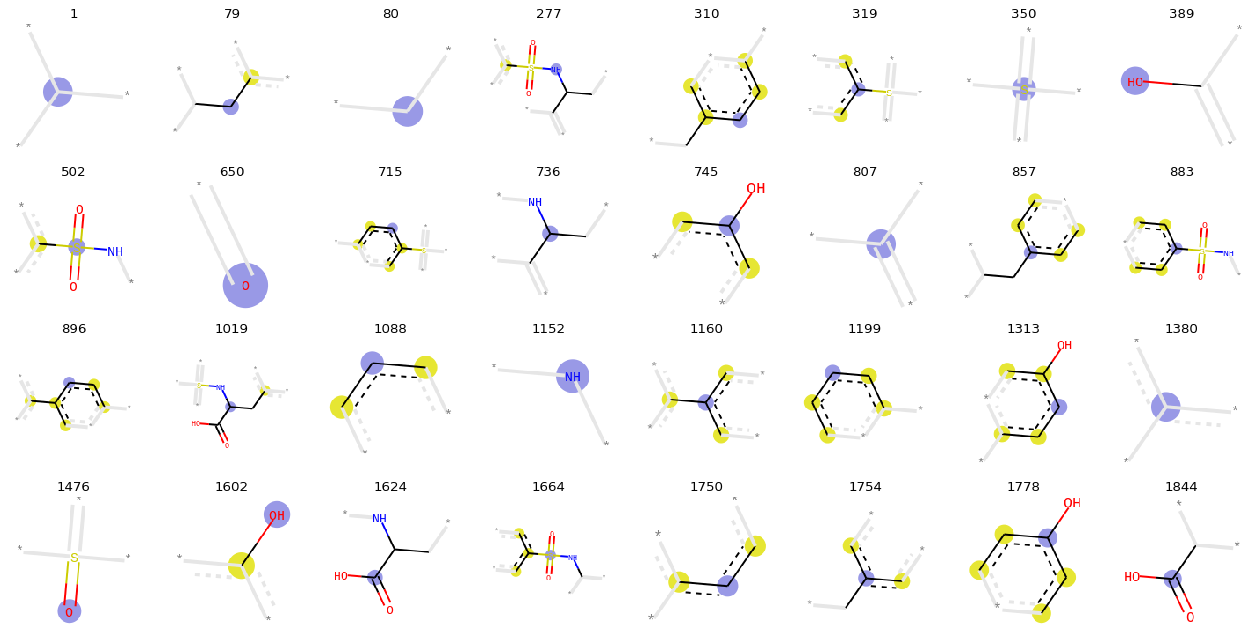

In [0]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

bits = fp.GetOnBits()
images = [Draw.DrawMorganBit(mols[0], bit, bi) for bit in bits]

fig, axes = plt.subplots(int(len(images)/8.0), 8, sharex=True, sharey=True, figsize=(20, 10), dpi=80) 

for img, ax, bit in zip(images, axes.flat, bits):
    ax.imshow(img)
    ax.axis('off')
    ax.title.set_text(bit)

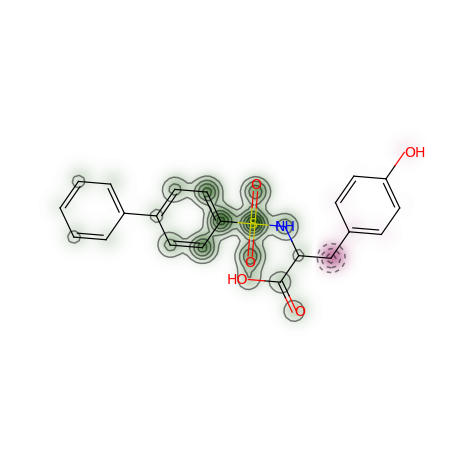

In [0]:
# use similarity maps between core and a molecule

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(core, mols[0], SimilarityMaps.GetMorganFingerprint)

## Descriptors

In [0]:
# calculate descriptors

!pip install mordred
from mordred import Calculator, descriptors

calc = Calculator(descriptors, ignore_3D=True)
descs = calc.pandas(mols[:10])
descs

     |████████████████████████████████| 133kB 9.4MB/s 
     |████████████████████████████████| 1.6MB 45.8MB/s 
  Created wheel for mordred: filename=mordred-1.2.0-cp37-none-any.whl size=176721 sha256=4cb540f6afeb4e72c5ae38b3f20b8449f7f15221edbaccb4b01c9d6c1c6556d4
  Stored in directory: /root/.cache/pip/wheels/ac/74/3f/2fd81b1187013f2eadb15620434813f1824c4c03b7bd1f94f6
Successfully built mordred


100%|██████████| 10/10 [00:07<00:00,  1.27it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,VE3_A,VR1_A,VR2_A,VR3_A,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,nHetero,nH,nB,nC,nN,nO,nS,nP,nF,nCl,nBr,nI,nX,ATS0dv,ATS1dv,ATS2dv,ATS3dv,ATS4dv,...,JGI7,JGI8,JGI9,JGI10,JGT10,Diameter,Radius,TopoShapeIndex,PetitjeanIndex,Vabc,VAdjMat,MWC01,MWC02,MWC03,MWC04,MWC05,MWC06,MWC07,MWC08,MWC09,MWC10,TMWC10,SRW02,SRW03,SRW04,SRW05,SRW06,SRW07,SRW08,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,21.716720,16.858726,1,0,35.697815,2.400986,4.801971,35.697815,1.274922,4.249572,4.463889,0.159425,2.525640,258.180479,9.220731,6.583278,18,18,47,28,0,0,7,19,0,21,1,5,1,0,0,0,0,0,0,400.444444,323.333333,543.000000,492.000000,460.666667,...,0.015309,0.010258,0.008668,0.008039,0.502705,16,8,1.000000,0.500000,349.095102,5.906891,30.0,4.976734,5.802118,6.670766,7.516977,8.386857,9.241354,10.112492,10.971383,11.843818,133.522499,4.110874,0.0,5.433722,0.000000,6.946014,0.000000,8.535622,0.000000,10.163965,63.190198,397.098394,8.448902,2254,42,144.0,165.0,9.590278,6.097222
1,22.533217,17.300133,1,0,36.457186,2.403529,4.807059,36.457186,1.257144,4.284528,4.548820,0.156856,2.579579,269.248238,9.284422,6.660345,18,18,47,29,0,0,8,18,0,21,1,5,1,0,0,0,1,0,1,407.511660,330.370370,550.555556,497.555556,465.703704,...,0.014881,0.010608,0.010807,0.007314,0.541028,17,9,0.888889,0.470588,368.378721,5.954196,31.0,5.017280,5.843544,6.715383,7.562681,8.434464,9.289983,10.162500,11.022344,11.895920,135.944099,4.143135,0.0,5.476464,0.000000,6.993015,0.000000,8.585039,0.000000,10.215118,64.412770,475.008906,10.106572,2512,44,150.0,172.0,10.451389,6.263889
2,22.533217,17.300133,1,0,36.457186,2.403529,4.807059,36.457186,1.257144,4.284528,4.548820,0.156856,2.579579,269.248238,9.284422,6.660345,18,18,50,29,0,0,7,21,0,22,1,5,1,0,0,0,0,0,0,408.444444,333.333333,555.000000,502.000000,468.666667,...,0.014881,0.010608,0.010807,0.007314,0.541028,17,9,0.888889,0.470588,366.391087,5.954196,31.0,5.017280,5.843544,6.715383,7.562681,8.434464,9.289983,10.162500,11.022344,11.895920,135.944099,4.143135,0.0,5.476464,0.000000,6.993015,0.000000,8.585039,0.000000,10.215118,64.412770,411.114044,8.222281,2512,44,150.0,172.0,10.451389,6.263889
3,27.918921,20.408861,1,0,45.630329,2.521321,4.945689,45.630329,1.303724,4.500538,4.307581,0.123074,2.713139,1739.521336,49.700610,8.714128,25,27,56,35,0,0,8,21,0,27,1,6,1,0,0,0,0,0,0,518.444444,468.333333,788.000000,750.000000,699.666667,...,0.013672,0.010479,0.011177,0.007593,0.470556,18,9,1.000000,0.500000,407.238946,6.285402,39.0,5.262690,6.129050,7.030857,7.918265,8.823648,9.719865,10.627818,11.528966,12.439099,153.480259,4.369448,0.0,5.726848,2.397895,7.277248,4.844187,8.911800,7.065613,10.590340,86.183379,487.108958,8.698374,4103,59,192.0,229.0,10.784722,7.458333
4,28.666468,20.184393,1,0,47.033960,2.480430,4.960860,47.033960,1.306499,4.524433,4.727483,0.131319,2.834327,928.670772,25.796410,8.114688,24,24,57,36,0,0,9,21,0,27,1,5,3,0,0,0,0,0,0,483.333333,415.000000,677.333333,644.777778,624.333333,...,0.014184,0.010004,0.009340,0.009030,0.472285,19,10,0.900000,0.473684,446.366768,6.321928,40.0,5.283204,6.142037,7.036148,7.914618,8.810907,9.697263,10.595209,11.485729,12.385151,155.350266,4.394449,0.0,5.746203,0.000000,7.295056,0.000000,8.930759,0.000000,10.611548,72.978015,535.058186,9.386986,4450,61,196.0,232.0,11.034722,7.680556
5,23.130934,17.624079,1,0,38.129481,2.404428,4.808855,38.129481,1.270983,4.315589,4.595099,0.153170,2.623603,294.878081,9.829269,6.785174,18,18,51,30,0,0,8,21,0,22,1,5,2,0,0,0,0,0,0,408.888889,332.666667,557.000000,506.000000,473.333333,...,0.014077,0.010322,0.011000,0.008433,0.528125,18,9,1.000000,0.500000,384.900112,6.000000,32.0,5.043425,5.872118,6.741701,7.590347,8.461046,9.317489,10.189381,11.049953,11.923119,138.188579,4.174387,0.0,5.501258,0.000000,7.016610,0.000000,8.608313,0.000000,10.238351,65.538919,443.086115,8.687963,2799,46,154.0,177.0,10.701389,6.597222
6,24.960294,19.224603,1,0,39.485

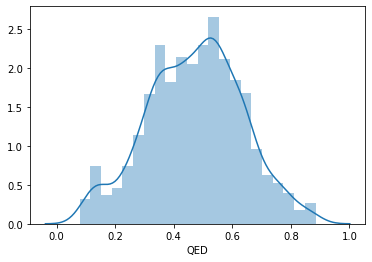

In [0]:
# simple rdkit descriptors

from rdkit.Chem import Descriptors

data['TPSA'] = [Descriptors.TPSA(mol) for mol in mols]
data['MW'] = [Descriptors.MolWt(mol) for mol in mols]
data['logP'] = [Descriptors.MolLogP(mol) for mol in mols]
data['QED'] = [Descriptors.qed(mol) for mol in mols]
sns.distplot(data['QED'])

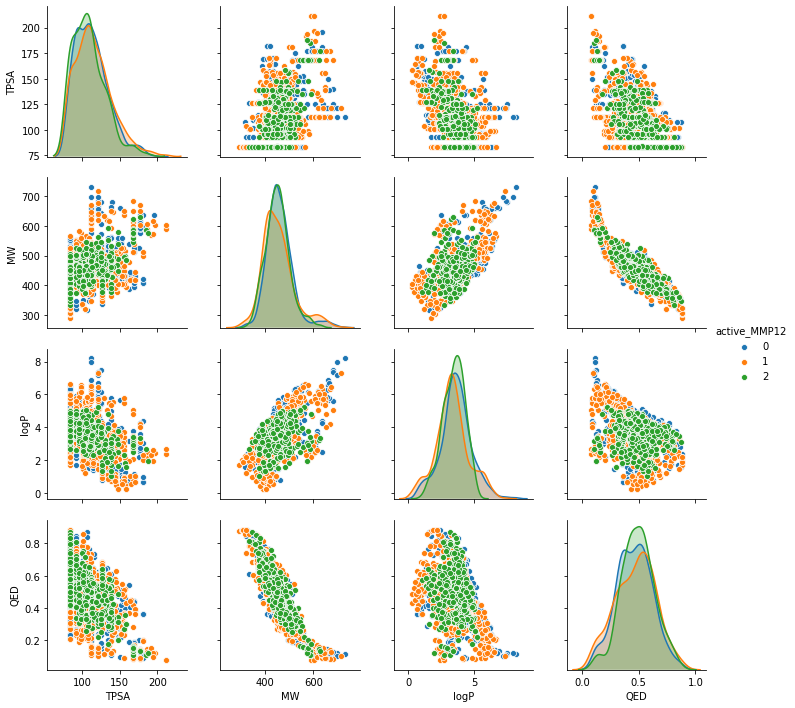

In [0]:
sns.pairplot(data,vars=['TPSA','MW','logP','QED'],hue='active_MMP12')

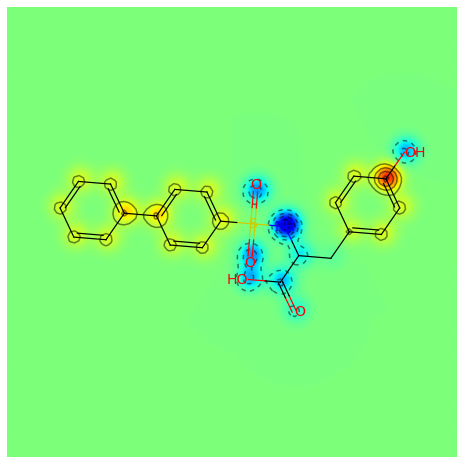

In [0]:
# visualise contribution

from rdkit.Chem import rdMolDescriptors

contribs = rdMolDescriptors._CalcCrippenContribs(mols[0])
fig = SimilarityMaps.GetSimilarityMapFromWeights(mols[0],[x for x,y in contribs], colorMap='jet', contourLines=10)

### Filters

In [0]:
from rdkit.Chem.FilterCatalog import *
 
params = FilterCatalogParams()
params.AddCatalog(FilterCatalogParams.FilterCatalogs.PAINS)

catalog = FilterCatalog(params)
functionalGroups = GetFunctionalGroupHierarchy()

pains = [match.GetDescription() for match in catalog.GetMatches(mols[0])]
functional = [match.filterMatch.GetName() for match in functionalGroups.GetFilterMatches(mols[0])]
functional

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.
  return f(*args, **kwds)


['CarboxylicAcid.Aliphatic', 'Alcohol.Aromatic']

### Synthetic tractability 

In [0]:
# SCscore 

# paper https://pubs.acs.org/doi/abs/10.1021/acs.jcim.7b00622
# git https://github.com/connorcoley/scscore

Cloning into 'rdkit'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 63481 (delta 0), reused 0 (delta 0), pack-reused 63479
Receiving objects: 100% (63481/63481), 152.67 MiB | 27.98 MiB/s, done.
Resolving deltas: 100% (48165/48165), done.


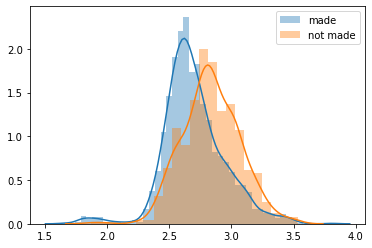

In [0]:
# SAscore

# paper: https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-1-8
!git clone https://github.com/rdkit/rdkit.git

sys.path.append('rdkit/Contrib/SA_Score/')
import sascorer

sa_scores = [sascorer.calculateScore(mol) for mol in mols]

bad_data=pd.read_excel('./ml100191f_si_002.xls')
bad_scores=[]
b=0
for smiles in bad_data[bad_data['pIC50_MMP12']=='Not Made']['Smiles']:
    try:
        bad_scores.append(sascorer.calculateScore(Chem.MolFromSmiles(smiles)))
    except:
        b+=1

f, ax = plt.subplots(1, 1)
sns.distplot(sa_scores,ax=ax,label='made')
sns.distplot(bad_scores,ax=ax,label='not made')
ax.legend()

## Chemical Space

### Similarity

In [0]:
sim_matrix = []
for i in range(len(morgan_fps)):
    sim_matrix.append(DataStructs.BulkTanimotoSimilarity(morgan_fps[i],morgan_fps))

sim_matrix=np.array(sim_matrix)
sim_matrix

array([[1.        , 0.83333333, 0.83333333, ..., 0.3880597 , 0.41269841,
        0.35714286],
       [0.83333333, 1.        , 0.77777778, ..., 0.35211268, 0.39393939,
        0.32432432],
       [0.83333333, 0.77777778, 1.        , ..., 0.39130435, 0.41538462,
        0.34246575],
       ...,
       [0.3880597 , 0.35211268, 0.39130435, ..., 1.        , 0.6875    ,
        0.58333333],
       [0.41269841, 0.39393939, 0.41538462, ..., 0.6875    , 1.        ,
        0.66666667],
       [0.35714286, 0.32432432, 0.34246575, ..., 0.58333333, 0.66666667,
        1.        ]])

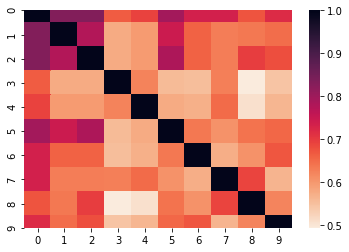

In [0]:
sns.heatmap(sim_matrix[:10,:10],cmap=cmap)

In [0]:
sim_threshold=0.7
adj_matrix=np.where((sim_matrix>=sim_threshold) & (sim_matrix<1.0),1,0)
adj_matrix

array([[0, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

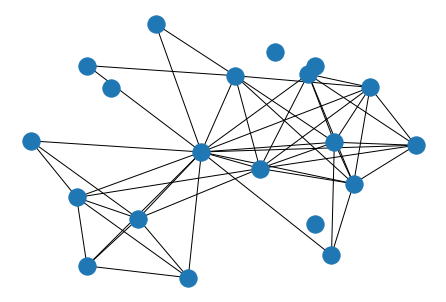

In [0]:
import networkx as nx

graph=nx.Graph(adj_matrix[:20,:20])
nx.draw_kamada_kawai(graph)

### Distance

,,,,,
,0,0.166667,0.166667,0.333333,0.307692
,0.166667,0,0.222222,0.423729,0.403509
,0.166667,0.222222,0,0.423729,0.403509
,0.333333,0.423729,0.423729,0,0.375
,0.307692,0.403509,0.403509,0.375,0

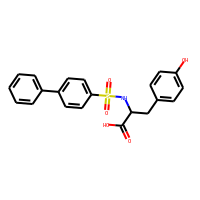
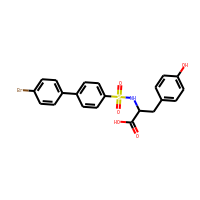
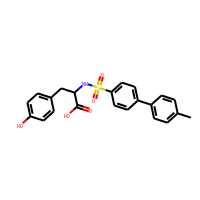
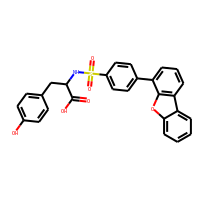
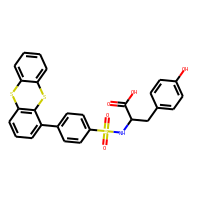
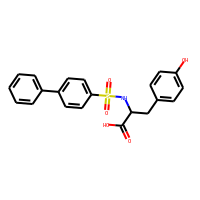
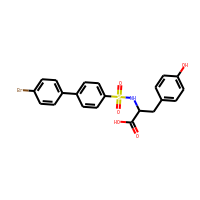
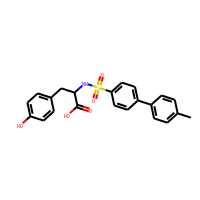
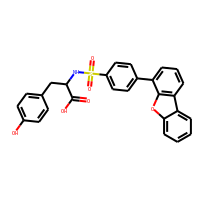
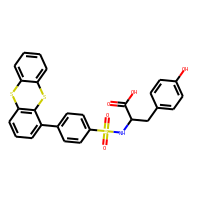

In [0]:
distance_matrix=1-sim_matrix

cm = sns.diverging_palette(220, 20, sep=20,as_cmap=True)
pd.DataFrame(distance_matrix[:5,:5],columns=mols[:5],index=mols[:5]).style.background_gradient(cmap=cmap)

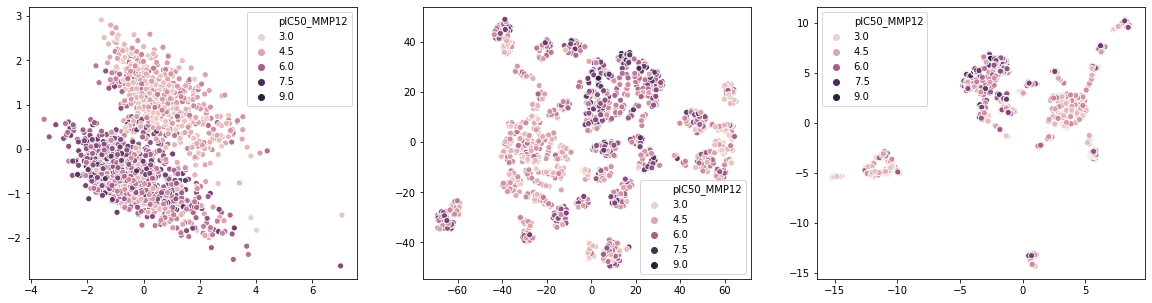

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

pca = PCA(n_components=2)
pca_coords=pca.fit_transform(distance_matrix)

tsne = TSNE(n_components=2)
tsne_coords=tsne.fit_transform(distance_matrix)

reducer = umap.UMAP()
umap_coords = reducer.fit_transform(distance_matrix)

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(pca_coords[:,0],pca_coords[:,1],hue=data.pIC50_MMP12,ax=ax[0])
sns.scatterplot(tsne_coords[:,0],tsne_coords[:,1],hue=data.pIC50_MMP12,ax=ax[1])
sns.scatterplot(umap_coords[:,0],umap_coords[:,1],hue=data.pIC50_MMP12,ax=ax[2])

### Diversity

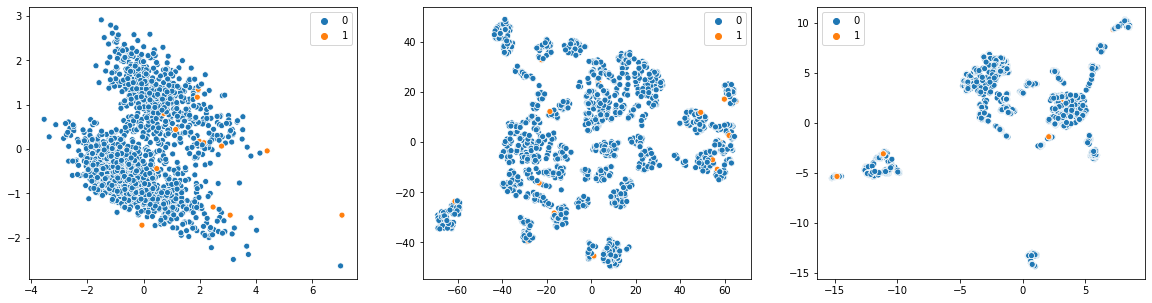

In [0]:
from rdkit import SimDivFilters

mmpick = SimDivFilters.rdSimDivPickers.MaxMinPicker()
pick_ids = mmpick.LazyBitVectorPick(morgan_fps,len(morgan_fps),20)
picked_up = [1 if i in pick_ids else 0 for i in range(len(data))]

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(pca_coords[:,0],pca_coords[:,1],hue=picked_up,ax=ax[0])
sns.scatterplot(tsne_coords[:,0],tsne_coords[:,1],hue=picked_up,ax=ax[1])
sns.scatterplot(umap_coords[:,0],umap_coords[:,1],hue=picked_up,ax=ax[2])

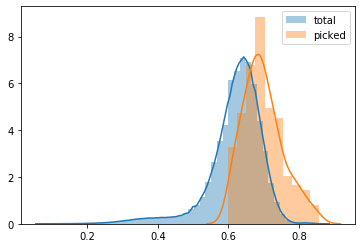

In [0]:
picked=distance_matrix[pick_ids,:][:,pick_ids][np.tril_indices(len(distance_matrix[pick_ids,:][:,pick_ids]),-1)]
total=distance_matrix[np.tril_indices(len(distance_matrix),-1)]

f, ax = plt.subplots(1, 1)
sns.distplot(total,ax=ax,label='total')
sns.distplot(picked,ax=ax,label='picked')
ax.legend()

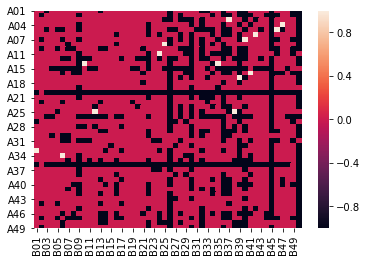

In [0]:
Atags = sorted(list(set(data.Atag)))
Btags = sorted(list(set(data.Btag)))
pick_matrix = pd.DataFrame(-1,index=Atags,columns=Btags)

for index, row in data.iterrows():
    value=0
    if index in list(pick_ids):
        value=1
    pick_matrix.loc[row['Atag'],row['Btag']]=value

sns.heatmap(pick_matrix)

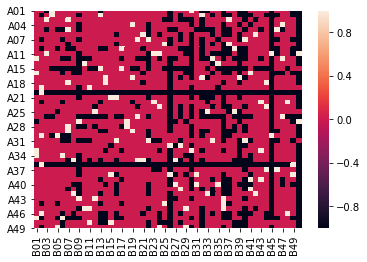

In [0]:
# sparse array

max_pick_per_monomer=2

sparse_matrix = pick_matrix
for atag in sparse_matrix.index:
    n_picked=sum([1 for btag in sparse_matrix.columns if sparse_matrix.loc[atag,btag]==1])
    options=[btag for btag in sparse_matrix.columns if sparse_matrix.loc[atag,btag]==0]
    to_pick=max_pick_per_monomer-n_picked
    if to_pick>0 and len(options)>to_pick:
        choice=np.random.choice(options, size=to_pick, replace=False)
        for c in choice:
            sparse_matrix.loc[atag,c]=1
    if len(options)<=to_pick:
        for c in options:
            sparse_matrix.loc[atag,c]=1
for btag in sparse_matrix.columns:
    n_picked=sum([1 for atag in sparse_matrix.index if sparse_matrix.loc[atag,btag]==1])
    options=[atag for atag in sparse_matrix.index if sparse_matrix.loc[atag,btag]==0]
    to_pick=max_pick_per_monomer-n_picked
    if to_pick>0 and len(options)>to_pick:
        choice=np.random.choice(options, size=to_pick, replace=False)
        for c in choice:
            sparse_matrix.loc[c,btag]=1
    if len(options)<=to_pick:
        for c in options:
            sparse_matrix.loc[c,btag]=1

sns.heatmap(sparse_matrix)

## Predictive Modelling

### Prepare datasets

In [0]:
from sklearn.model_selection import train_test_split
np.random.seed(1234)

id_train, id_test, X_train, X_test, y_train, y_test, c_train, c_test = train_test_split(range(len(data)), np_fps, np.array(data['pIC50_MMP12']), np.array(data['active_MMP12']), test_size=0.33, random_state=1234)

### Classification model

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=1234)
rf.fit(X_train, c_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

[[219  26   0]
 [ 44 142  21]
 [  0  35  76]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2')]

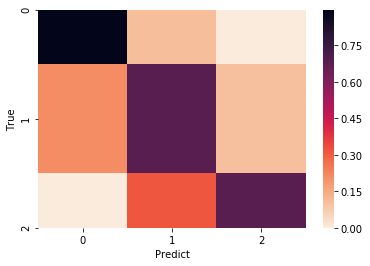

In [0]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

c_pred = rf.predict(X_test)
cm = confusion_matrix(c_test, c_pred)
print(cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # noramalise

ax = plt.subplot()
sns.heatmap(cm, ax = ax,cmap=cmap)
ax.set_xlabel('Predict')
ax.set_ylabel('True')
ax.xaxis.set_ticklabels(rf.classes_); ax.yaxis.set_ticklabels(rf.classes_)

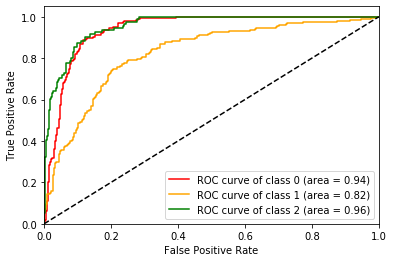

In [0]:
from itertools import cycle

c_prob = rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(rf.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(c_test==i, c_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['red', 'orange', 'green'])
plt.figure()
for i,color in zip(range(rf.n_classes_),colors):
    plt.plot(fpr[i], tpr[i],color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [0]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = range(X_train.shape[1]),columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head()

,importance
352,0.049375
1964,0.040957
222,0.035004
1039,0.023838
984,0.019669


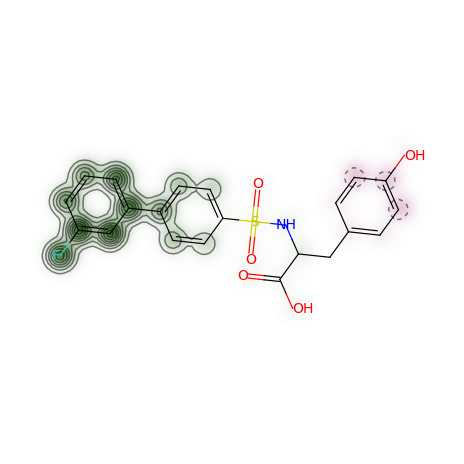

In [0]:
from rdkit.Chem.Draw import SimilarityMaps

# helper function
def getProba(fp, predictionFunction):
    return predictionFunction((fp,))[0][1]

fig, maxweight = SimilarityMaps.GetSimilarityMapForModel(mols[10], SimilarityMaps.GetMorganFingerprint, lambda x: getProba(x, rf.predict_proba))

### Conformal Prediction

In [0]:
!pip install nonconformist

from nonconformist.base import ClassifierAdapter
from nonconformist.icp import IcpClassifier
from nonconformist.nc import ClassifierNc, MarginErrFunc

X_model, X_calib, y_model, y_calib, c_model, c_calib = train_test_split(X_train, y_train, c_train, test_size=0.33, random_state=1234)

     |████████████████████████████████| 6.7MB 4.1MB/s 
     |████████████████████████████████| 25.2MB 89kB/s 
     |████████████████████████████████| 296kB 53.6MB/s 
  Created wheel for nonconformist: filename=nonconformist-2.1.0-cp37-none-any.whl size=17842 sha256=7e9d6dacf727a44ae3417457ccaad18098402f29236fd39aaa0d6888fbee93b0
  Stored in directory: /root/.cache/pip/wheels/e9/55/4a/66642602510a476306f9328a9b969087e7a0896cbf7d7a50bc
Successfully built nonconformist


In [0]:
icp = IcpClassifier(ClassifierNc(ClassifierAdapter(rf),MarginErrFunc()))
icp.fit(X_model,c_model)
icp.calibrate(X_calib,c_calib)

cp_predict = icp.predict(X_test, significance=0.1)
cp_confidence = icp.predict_conf(X_test)[:,1]

In [0]:
confidence_thresh = 0.9
conform = np.where(cp_confidence >= confidence_thresh)[0]

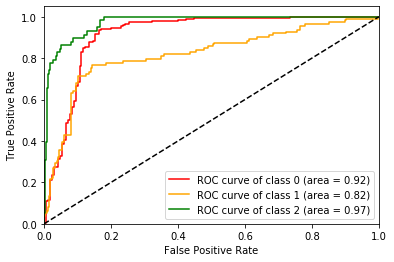

In [0]:
c_prob = rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(rf.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(c_test[conform]==i, c_prob[conform, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['red', 'orange', 'green'])
plt.figure()
for i,color in zip(range(rf.n_classes_),colors):
    plt.plot(fpr[i], tpr[i],color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Calculate multiple models

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


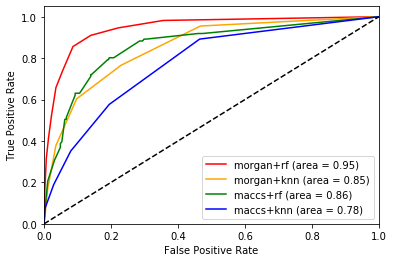

In [0]:
# picking the best model is just two loops away

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

sets = {'morgan':np_fps,
        'maccs':maccs_fps}

methods = {'rf':RandomForestClassifier(),
           'knn':KNeighborsClassifier()}

fpr = dict()
tpr = dict()
roc_auc = dict()

for name,fps in sets.items():
    X_train,X_test = fps[id_train],fps[id_test]
    for method,classifier in methods.items():
        model = classifier.fit(X_train,c_train)
        c_prob = model.predict_proba(X_test)
        pair=name+'+'+method
        fpr[pair], tpr[pair], _ = roc_curve(c_test==2, c_prob[:, 2])
        roc_auc[pair] = auc(fpr[pair], tpr[pair])

colors = cycle(['red', 'orange', 'green','blue'])
plt.figure()
for method,color in zip(roc_auc.keys(),colors):
    plt.plot(fpr[method], tpr[method],color=color,
             label='{0} (area = {1:0.2f})'
             ''.format(method, roc_auc[method]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### MMP

In [0]:
# https://github.com/rdkit/mmpdb
# paper https://pubs.acs.org/doi/10.1021/acs.jcim.8b00173

## Active Learning

In [0]:
!pip install modAL

from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling

def calc_auc(c,p):
    fpr, tpr, _ = roc_curve(c,p)
    roc_auc = auc(fpr, tpr)
    return(roc_auc)

np.random.seed(1)
n_select=20

X_pool=X_train
c_pool=c_train
y_pool=y_train

id_query=np.random.choice(range(len(X_pool)), n_select, replace=False)
mean_query=np.mean(y_pool[id_query])

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_pool[id_query], y_training=c_pool[id_query]
)
X_pool=np.delete(X_pool,id_query,0)
c_pool=np.delete(c_pool,id_query,0)
y_pool=np.delete(y_pool,id_query,0)

results=[]
for iteration in range(20):
    iter_auc=calc_auc(c_test==2, learner.predict_proba(X_test)[:, 2])
    results.append([iteration+1,iter_auc,len(learner.X_training),len(X_pool),mean_query])
    id_query,id_inst=learner.query(X_pool, n_instances=n_select)
    learner.teach(X_pool[id_query],c_pool[id_query])
    mean_query=np.mean(y_pool[id_query])
    X_pool=np.delete(X_pool,id_query,0)
    c_pool=np.delete(c_pool,id_query,0)
    y_pool=np.delete(y_pool,id_query,0)

explore=pd.DataFrame(results,columns=['iteration','auc','n_train','n_pool','mean'])
explore

  Using cached https://files.pythonhosted.org/packages/1a/36/9558ec3ee50263f10a47c425b43941a9018eebcbd8a95685cb7b2363704c/modAL-0.3.5-py3-none-any.whl


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,iteration,auc,n_train,n_pool,mean
0,1,0.632963,20,1121,5.385
1,2,0.671420,40,1101,5.665
2,3,0.714741,60,1081,5.670
3,4,0.661614,80,1061,6.285
4,5,0.746004,100,1041,5.650
5,6,0.710257,120,1021,5.785
6,7,0.771954,140,1001,5.650
7,8,0.785488,160,981,5.445
8,9,0.767011,180,961,5.465
9,10,0.801343,200,941,5.285


In [0]:
# random

np.random.seed(1)
X_pool=X_train
c_pool=c_train
y_pool=y_train

estimator=RandomForestClassifier()
id_query=np.random.choice(range(len(X_pool)), n_select, replace=False)
estimator.fit(X_pool[id_query],c_pool[id_query])
mean_query=np.mean(y_pool[id_query])

results=[]
for iteration in range(20):
    iter_auc=calc_auc(c_test==2, estimator.predict_proba(X_test)[:, 2])
    options=np.setdiff1d(range(len(X_pool)),id_query)
    results.append([iteration+1,iter_auc,len(id_query),len(options),mean_query])
    id_query=np.append(id_query,np.random.choice(options, n_select, replace=False))
    mean_query=np.mean(y_pool[id_query])
    estimator.fit(X_pool[id_query],c_pool[id_query])

randomly=pd.DataFrame(results,columns=['iteration','auc','n_train','n_pool','mean'])
randomly

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,iteration,auc,n_train,n_pool,mean
0,1,0.632963,20,1121,5.385000
1,2,0.677848,40,1101,5.422500
2,3,0.644393,60,1081,5.536667
3,4,0.705324,80,1061,5.532500
4,5,0.685721,100,1041,5.446000
5,6,0.693245,120,1021,5.498333
6,7,0.732809,140,1001,5.494286
7,8,0.732719,160,981,5.509375
8,9,0.770350,180,961,5.502222
9,10,0.700929,200,941,5.473000


In [0]:
# exploit

np.random.seed(1)
X_pool=X_train
c_pool=c_train
y_pool=y_train

estimator=RandomForestClassifier()
id_query=np.random.choice(range(len(X_pool)), n_select, replace=False)
mean_query=np.mean(y_pool[id_query])
estimator.fit(X_pool[id_query],c_pool[id_query])

results=[]
for iteration in range(20):
    iter_auc=calc_auc(c_test==2, estimator.predict_proba(X_test)[:, 2])
    results.append([iteration+1,iter_auc,len(id_query),len(X_pool),mean_query])
    id_query=np.append(id_query,np.argsort(estimator.predict_proba(X_pool)[:,2])[::-1][:n_select])
    mean_query=np.mean(y_pool[id_query])
    estimator.fit(X_pool[id_query],c_pool[id_query])

exploit=pd.DataFrame(results,columns=['iteration','auc','n_train','n_pool','mean'])
exploit

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,iteration,auc,n_train,n_pool,mean
0,1,0.632963,20,1141,5.385000
1,2,0.605657,40,1141,5.807500
2,3,0.684446,60,1141,6.051667
3,4,0.643865,80,1141,6.262500
4,5,0.650004,100,1141,6.444000
5,6,0.682123,120,1141,6.562500
6,7,0.708991,140,1141,6.648571
7,8,0.718807,160,1141,6.708750
8,9,0.684266,180,1141,6.758333
9,10,0.715010,200,1141,6.763000


In [0]:
# balanced explore/exploit

np.random.seed(1)

X_pool=X_train
c_pool=c_train
y_pool=y_train

id_query=np.random.choice(range(len(X_pool)), n_select, replace=False)
mean_query=np.mean(y_pool[id_query])

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_pool[id_query], y_training=c_pool[id_query]
)
X_pool=np.delete(X_pool,id_query,0)
c_pool=np.delete(c_pool,id_query,0)
y_pool=np.delete(y_pool,id_query,0)

results=[]
for iteration in range(20):
    iter_auc=calc_auc(c_test==2, learner.predict_proba(X_test)[:, 2])
    results.append([iteration+1,iter_auc,len(learner.X_training),len(X_pool),mean_query])
    explore_query,explore_inst=learner.query(X_pool, n_instances=10)
    exploit_query=np.argsort(estimator.predict_proba(X_pool)[:,2])[::-1][:10]
    id_query=np.append(explore_query,exploit_query)
    mean_query=np.mean(y_pool[id_query])
    learner.teach(X_pool[id_query],c_pool[id_query])
    X_pool=np.delete(X_pool,id_query,0)
    c_pool=np.delete(c_pool,id_query,0)
    y_pool=np.delete(y_pool,id_query,0)

balanced=pd.DataFrame(results,columns=['iteration','auc','n_train','n_pool','mean'])
balanced

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,iteration,auc,n_train,n_pool,mean
0,1,0.632963,20,1121,5.385
1,2,0.655794,40,1101,6.140
2,3,0.731324,60,1081,6.230
3,4,0.728245,80,1061,6.480
4,5,0.746652,100,1041,6.525
5,6,0.754335,120,1021,6.070
6,7,0.809535,140,1001,6.095
7,8,0.752910,160,981,5.595
8,9,0.801762,180,961,5.890
9,10,0.799430,200,941,5.855


In [0]:
# sparsed

np.random.seed(1)

X_pool=X_train
c_pool=c_train
y_pool=y_train

mmpick = SimDivFilters.rdSimDivPickers.MaxMinPicker()
id_query = mmpick.LazyBitVectorPick([morgan_fps[i] for i in range(len(morgan_fps)) if i in id_train],len(X_train),n_select)
mean_query=np.mean(y_pool[id_query])

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_pool[id_query], y_training=c_pool[id_query]
)
X_pool=np.delete(X_pool,id_query,0)
c_pool=np.delete(c_pool,id_query,0)
y_pool=np.delete(y_pool,id_query,0)

results=[]
for iteration in range(20):
    iter_auc=calc_auc(c_test==2, learner.predict_proba(X_test)[:, 2])
    results.append([iteration+1,iter_auc,len(learner.X_training),len(X_pool),mean_query])
    explore_query,explore_inst=learner.query(X_pool, n_instances=10)
    exploit_query=np.argsort(estimator.predict_proba(X_pool)[:,2])[::-1][:10]
    id_query=np.append(explore_query,exploit_query)
    mean_query=np.mean(y_pool[id_query])
    learner.teach(X_pool[id_query],c_pool[id_query])
    X_pool=np.delete(X_pool,id_query,0)
    c_pool=np.delete(c_pool,id_query,0)
    y_pool=np.delete(y_pool,id_query,0)

sparsed=pd.DataFrame(results,columns=['iteration','auc','n_train','n_pool','mean'])
sparsed

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,iteration,auc,n_train,n_pool,mean
0,1,0.629644,20,1121,5.285
1,2,0.697899,40,1101,6.310
2,3,0.703689,60,1081,6.290
3,4,0.732112,80,1061,6.120
4,5,0.735420,100,1041,6.250
5,6,0.737354,120,1021,5.740
6,7,0.736865,140,1001,5.715
7,8,0.751066,160,981,5.685
8,9,0.776798,180,961,6.040
9,10,0.788468,200,941,5.660


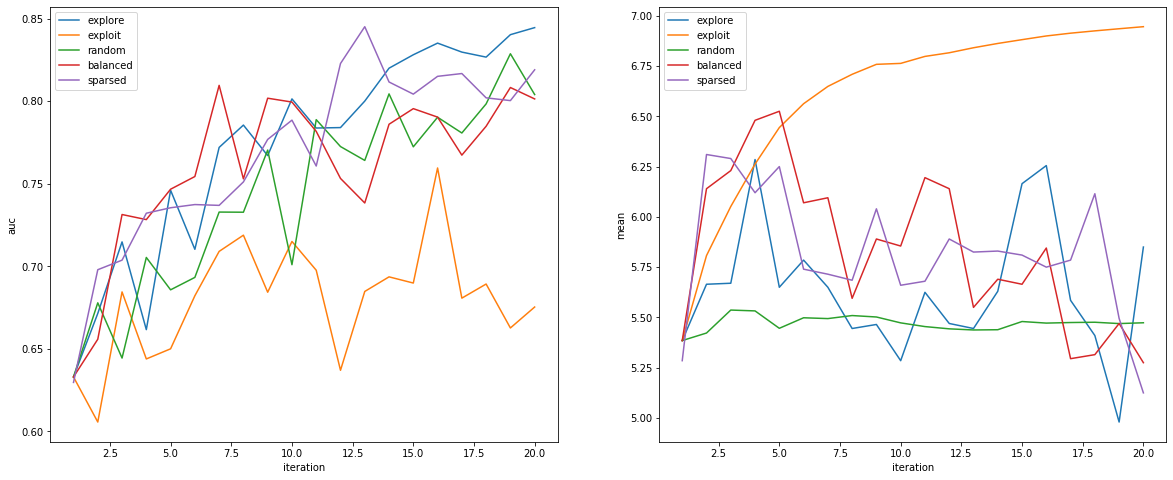

In [0]:
# visualise results of each stratergy by test auc and the mean pool values

f, ax = plt.subplots(1, 2,figsize=(20,8))
sns.lineplot(ax=ax[0],x="iteration", y="auc", data=explore, label='explore')
sns.lineplot(ax=ax[0],x="iteration", y="auc", data=exploit, label='exploit')
sns.lineplot(ax=ax[0],x="iteration", y="auc", data=randomly, label='random')
sns.lineplot(ax=ax[0],x="iteration", y="auc", data=balanced, label='balanced')
sns.lineplot(ax=ax[0],x="iteration", y="auc", data=sparsed, label='sparsed')
ax[0].legend()
sns.lineplot(ax=ax[1],x="iteration", y="mean", data=explore, label='explore')
sns.lineplot(ax=ax[1],x="iteration", y="mean", data=exploit, label='exploit')
sns.lineplot(ax=ax[1],x="iteration", y="mean", data=randomly, label='random')
sns.lineplot(ax=ax[1],x="iteration", y="mean", data=balanced, label='balanced')
sns.lineplot(ax=ax[1],x="iteration", y="mean", data=sparsed, label='sparsed')
ax[1].legend()

## Molecular Generators

### RECAP

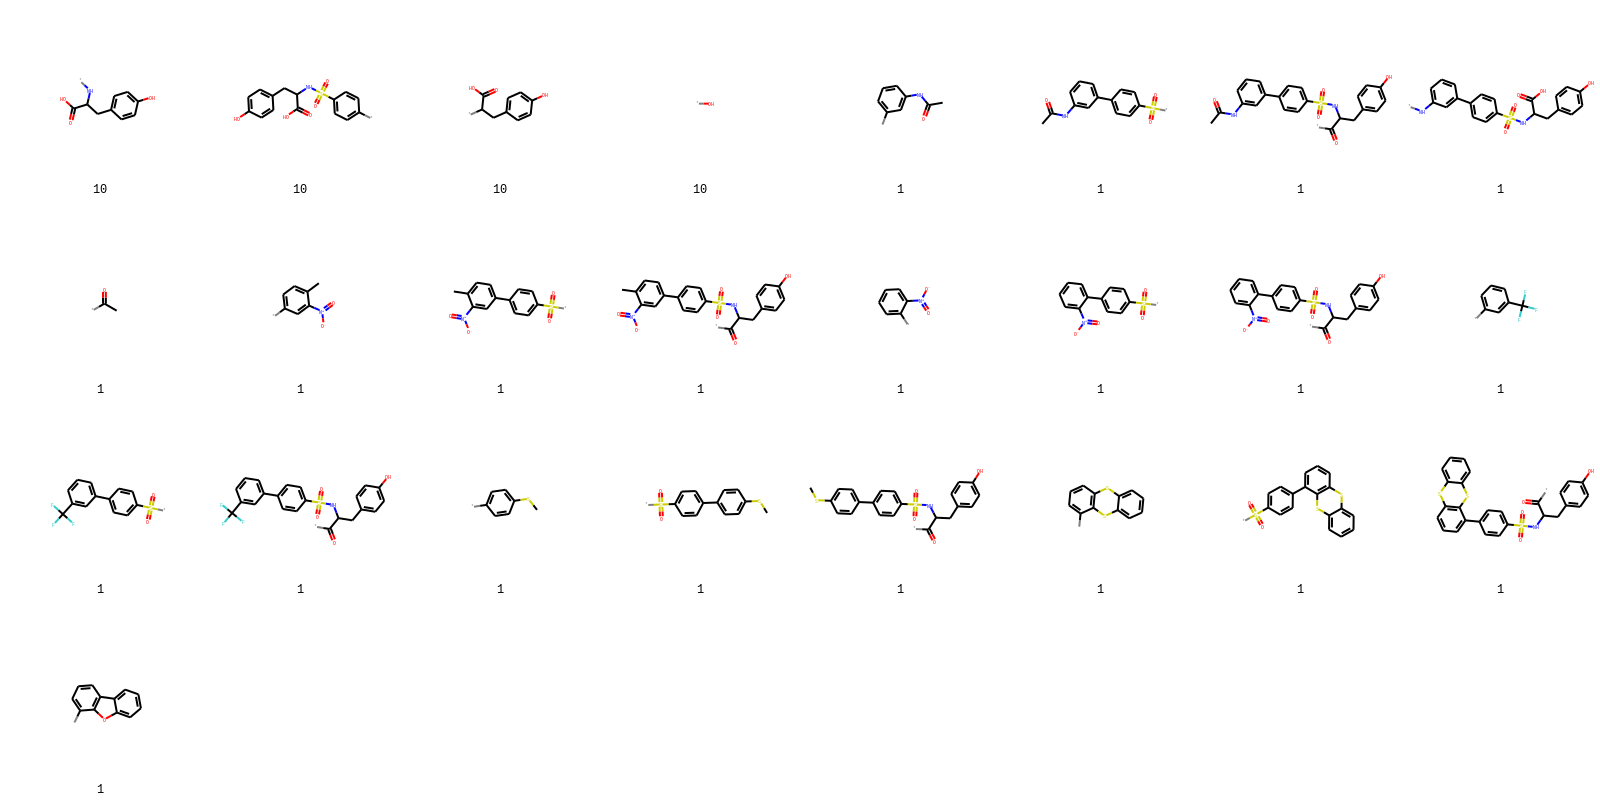

In [0]:
from rdkit.Chem import Recap
from collections import Counter
import operator

children = [item for mol in mols[:10] for item in Recap.RecapDecompose(mol).children.keys()]
sorted_x = sorted(dict(Counter(children)).items(), key=operator.itemgetter(1))
pieces,counts = [],[]
for smi,n in sorted_x[:10:-1]:
    pieces.append(Chem.MolFromSmiles(smi))
    counts.append(n)
    
Draw.MolsToGridImage(pieces,molsPerRow=8,legends=[str(c) for c in counts])

### BRICS

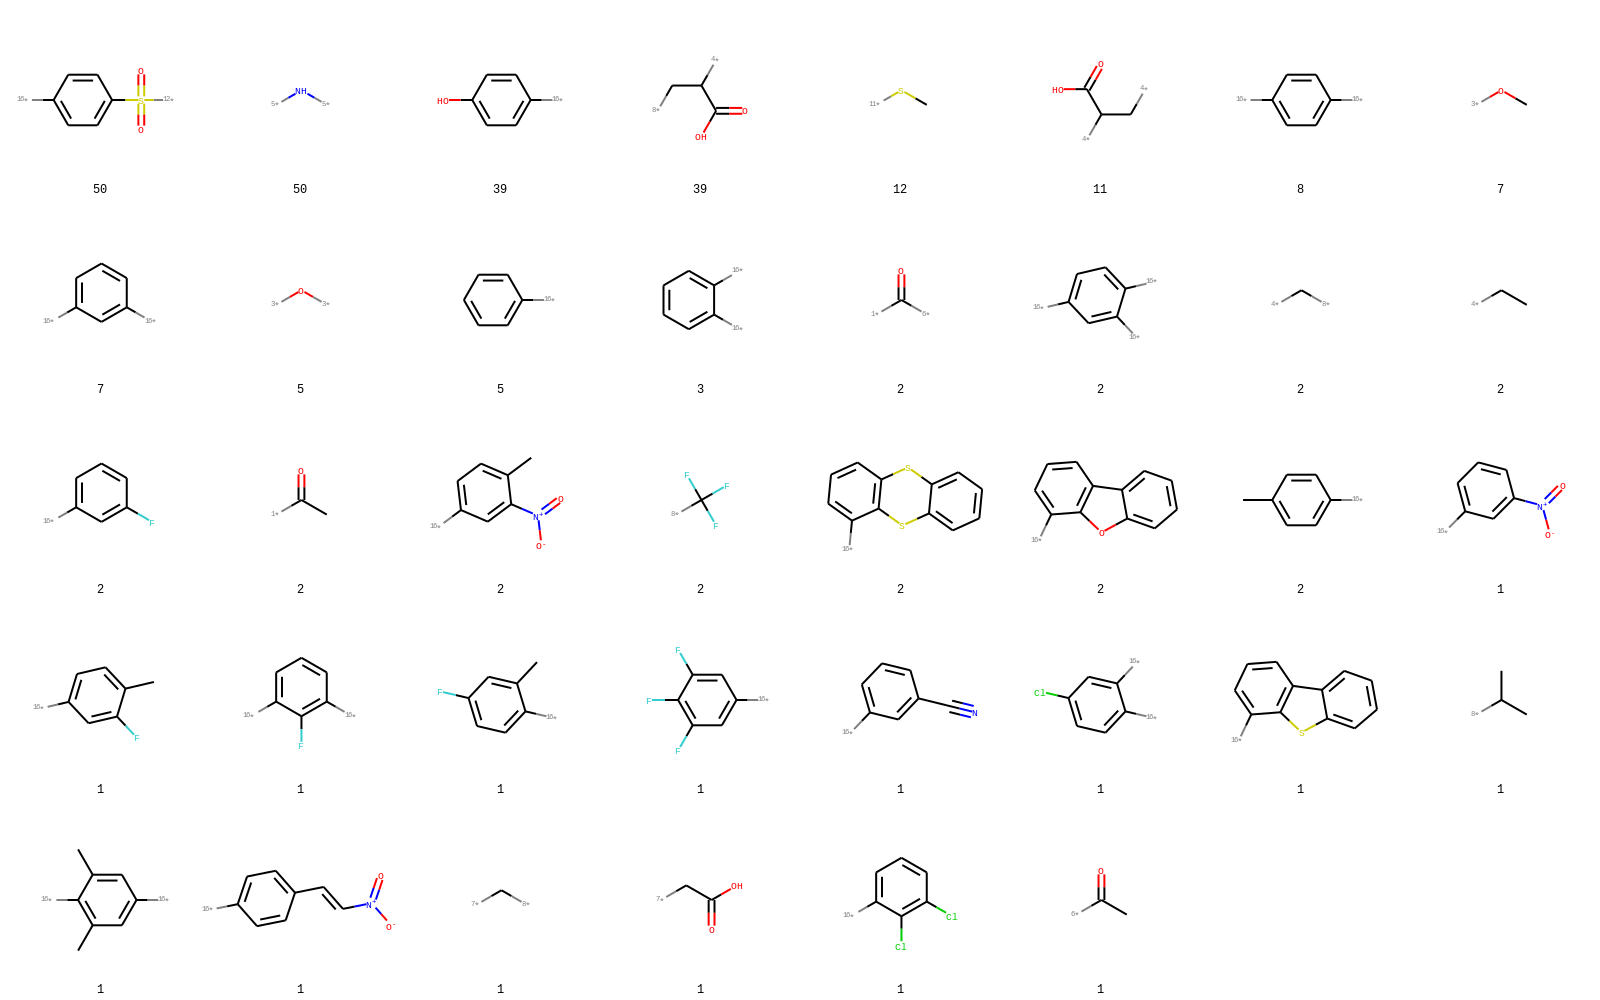

In [0]:
from rdkit.Chem import BRICS
from collections import Counter
import operator

breaks = [item for mol in mols[:50] for item in BRICS.BRICSDecompose(mol)]
sorted_x = sorted(dict(Counter(breaks)).items(), key=operator.itemgetter(1))
pieces,counts = [],[]
for smi,n in sorted_x[:10:-1]:
    pieces.append(Chem.MolFromSmiles(smi))
    counts.append(n)

Draw.MolsToGridImage(pieces,molsPerRow=8,legends=[str(c) for c in counts])

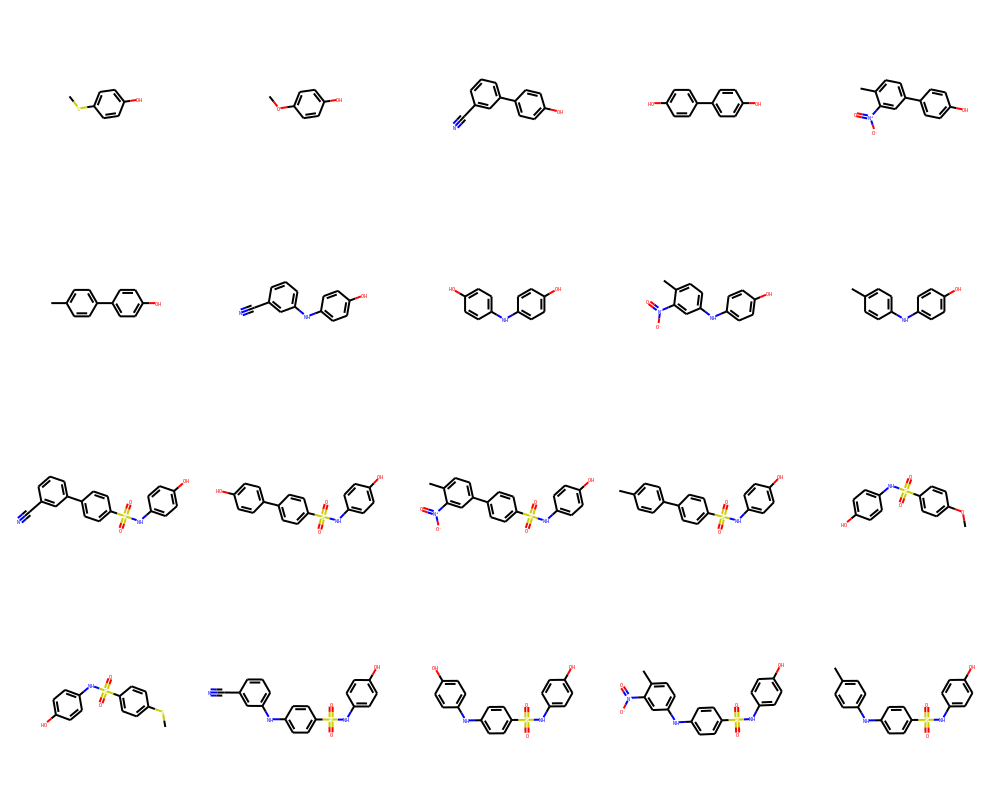

In [0]:
# random generation

import random

new_mols = []
random.seed(1234)
brics_gen = BRICS.BRICSBuild(random.choices(pieces, counts, k=10))
for tm in [next(brics_gen) for x in range(20)]:
    try:
        Chem.SanitizeMol(tm)
    except:
        continue
    new_mols.append(tm)
Draw.MolsToGridImage(new_mols,molsPerRow=5)

### VAE Generators

In [0]:
#!git clone https://github.com/chembl/autoencoder_ipython.git

In [0]:
#!git clone https://github.com/aspuru-guzik-group/chemical_vae.git

In [0]:
#!git clone https://github.com/topazape/molecular-VAE.git

In [0]:
#!git clone https://github.com/wengong-jin/icml18-jtnn.git

# try generating sample from the followwing starting points:

# starting from a molecule (pick any)
Chem.MolToSmiles(mols[0])

# starting from the core smiles
core='O=C(O)C(NS(=O)(=O)c1ccccc1)'

# please open seperate notebook to complete the junction tree VAE

## All together now

Now it's time to put all components to work together with your own data or any public data you are interested in

Use the code above to create a pipeline in from an intial dataset -> cleaninig -> visualising -> modelling -> generating ideas -> filtering molecules for screening

Bonus: how would you handle multiple parameter optimisation?